### Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import acquire
import prepare

In [2]:
df = prepare.prep_sales_data()

In [3]:
df.head(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92


In [4]:
df.tail(1)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2017-12-31,50,82.0,913000,10,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.2,47445919221,47445919221,8503 NW Military Hwy,San Antonio,TX,78231,December,Sunday,426.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store_id       913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  object 
 14  day            913000 non-null  object 
 15  sales_total    913000 non-null  float64
dtypes: float64(3), int64(6), object(7)
memory usage: 118.4+ MB

In [6]:
df.describe()

,item_id,sale_amount,sale_id,store_id,item_price,item_upc12,item_upc14,store_zipcode,sales_total
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,9.130000e+05,9.130000e+05,913000.000000,913000.000000
mean,25.500000,52.250287,456500.500000,5.500000,5.160400,2.384688e+11,2.384688e+11,78224.800000,280.898866
std,14.430878,28.801144,263560.542223,2.872283,2.737764,2.978005e+11,2.978005e+11,16.479087,227.686575
min,1.000000,0.000000,1.000000,1.000000,0.600000,8.500005e+09,8.500005e+09,78201.000000,0.000000
25%,13.000000,30.000000,228250.750000,3.000000,2.970000,3.367410e+10,3.367410e+10,78217.000000,98.010000
50%,25.500000,47.000000,456500.500000,5.500000,5.195000,7.103651e+10,7.103651e+10,78220.500000,233.280000
75%,38.000000,70.000000,684750.250000,8.000000,7.520000,6.030842e+11,6.030842e+11,78232.000000,402.780000
max,50.000000,231.000000,913000.000000,10.000000,9.640000,8.846237e+11,8.846237e+11,78253.000000,2104.410000


<AxesSubplot:>

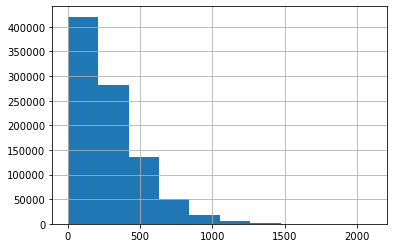

In [7]:
df.sales_total.hist()

In [8]:
train = df.loc[:'2016']
test = df.loc['2017']

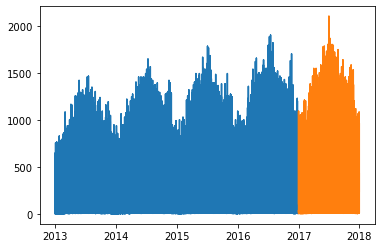

In [9]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.show()

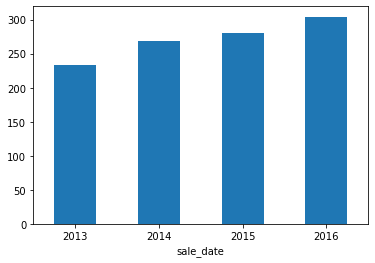

In [10]:
train.groupby(train.index.year).sales_total.mean().plot.bar().tick_params('x', rotation=0)

<AxesSubplot:xlabel='sale_date'>

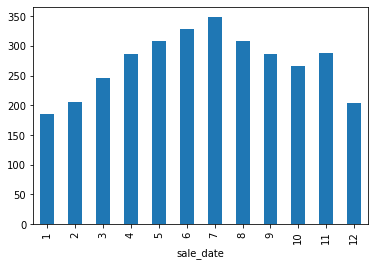

In [11]:
train.groupby(train.index.month).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='day', ylabel='sales_total'>

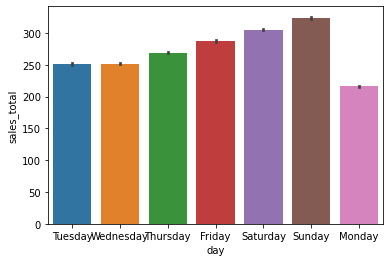

In [12]:
sns.barplot(data=train, y='sales_total', x='day')

<AxesSubplot:xlabel='sale_date'>

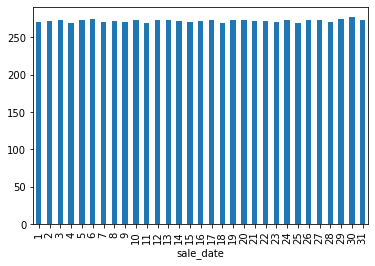

In [13]:
train.groupby(train.index.day).sales_total.mean().plot.bar()

<AxesSubplot:xlabel='sale_date'>

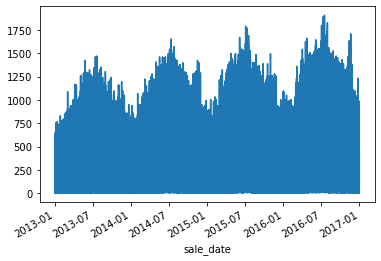

In [14]:
train.sales_total.plot()

In [15]:
y = train.sales_total

<AxesSubplot:xlabel='sale_date'>

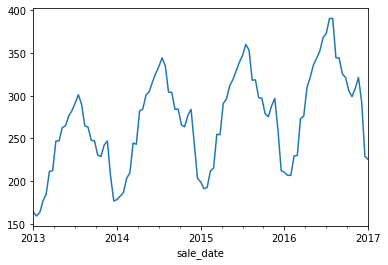

In [16]:
y.resample('2W').mean().plot()

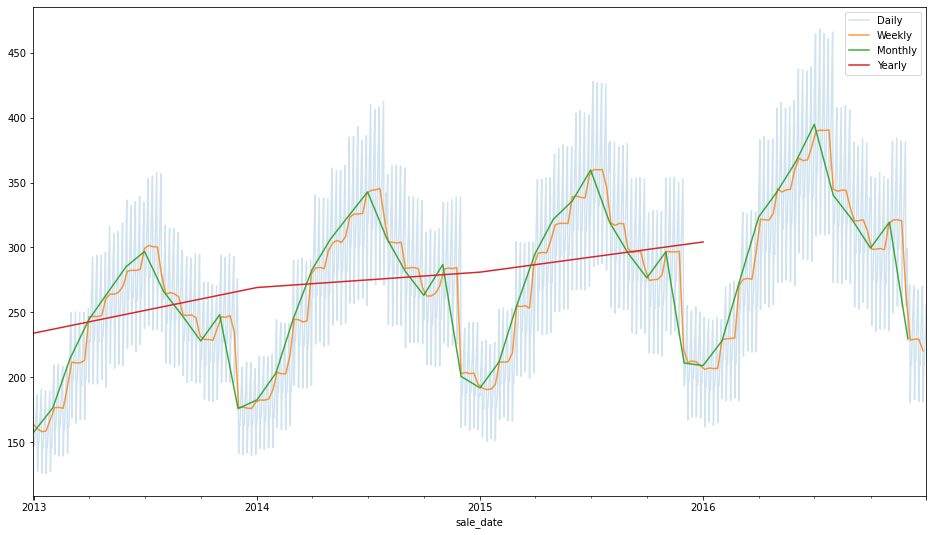

In [17]:
plt.figure(figsize=[16,9])
y.resample('D').mean().plot(alpha=0.2, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

<AxesSubplot:xlabel='sale_date'>

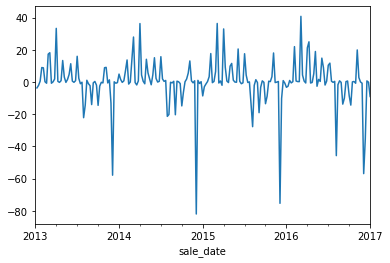

In [18]:
y.resample('W').mean().diff().plot()

(516.0, 563.0)


[Text(0.5, 1.0, 'Sales Total Over Time')]

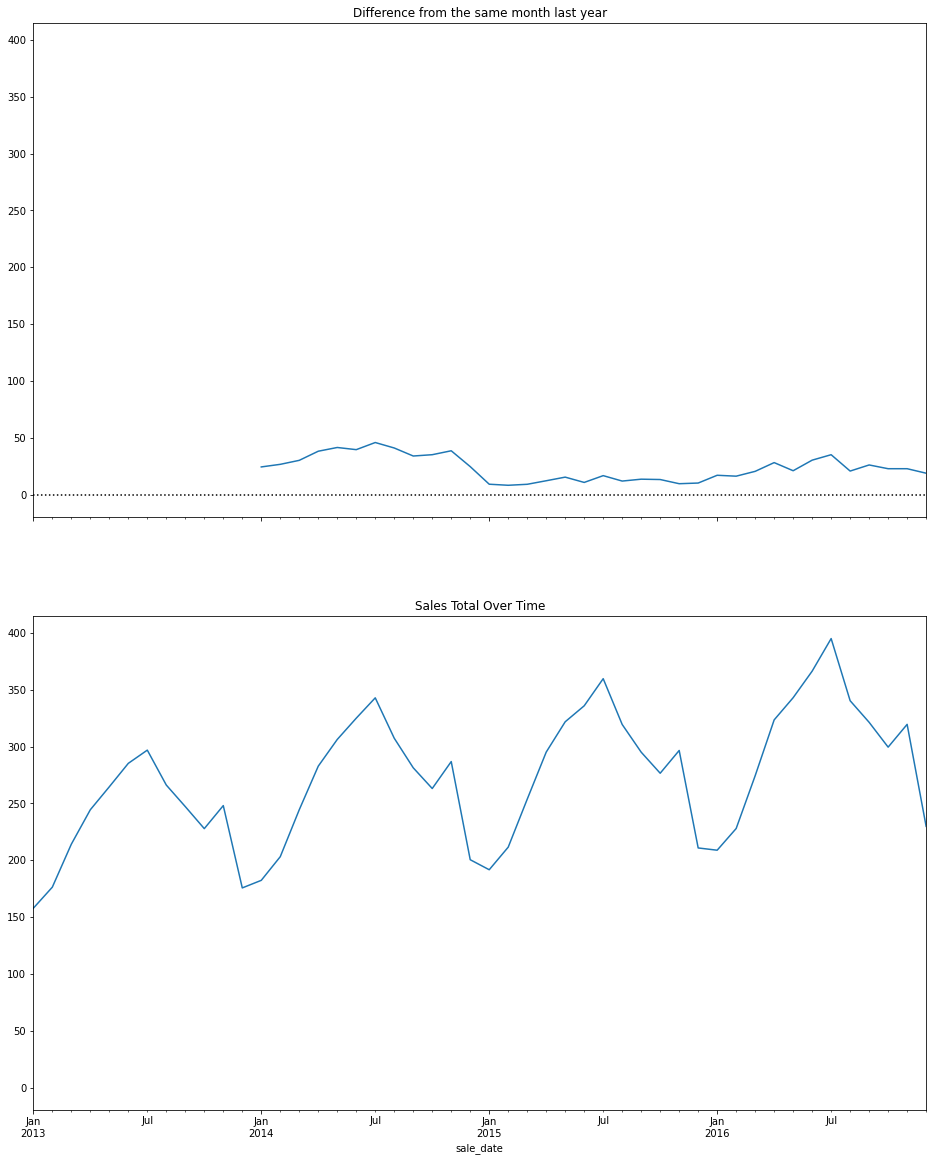

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1, 
                               sharex=True, 
                               sharey=True, 
                               figsize=(16,20))
ax = y.resample('M').mean().diff(12).plot(ax=ax1)
# we will draw a horizontal line here, unpack the xlim with *
ax1.hlines(0, *ax1.get_xlim(), color='black', ls=':')
print(ax1.get_xlim())
ax1.set(title='Difference from the same month last year')

y.resample('M').mean().plot(ax=ax2)
ax2.set(title='Sales Total Over Time')

<AxesSubplot:xlabel='store_id'>

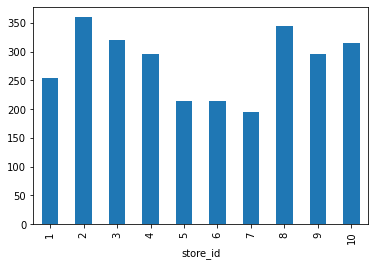

In [20]:
df.groupby('store_id').sales_total.mean().plot.bar()

In [21]:
ops = prepare.prep_ops()

/Users/dashiellbringhurst/codeup-data-science/time-series-exercises/prepare.py:44: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ops.columns = ops.columns.str.lower().str.replace('+', '_')


In [22]:
ops.head()

,consumption,wind,solar,wind_solar,month,year,non_renew
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,1069.184
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,1380.521
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,1442.533
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,1457.217
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,1477.131


In [23]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
 6   non_renew    4383 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 273.9+ KB


In [24]:
ops.describe()

,consumption,wind,solar,wind_solar,year,non_renew
count,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,1338.675836,109.800909,44.558071,154.358980,2011.500342,1184.316856
std,165.775710,140.698109,60.853561,165.174461,3.452347,226.396524
min,842.395000,0.000000,0.000000,0.000000,2006.000000,319.386300
25%,1217.859000,0.000000,0.000000,0.000000,2008.500000,1035.920500
50%,1367.123000,62.293000,0.000000,123.808000,2012.000000,1201.703000
75%,1457.761000,162.366000,86.268000,248.019500,2014.500000,1359.298000
max,1709.568000,826.278000,241.580000,851.556000,2017.000000,1644.873000


In [25]:
ops.tail(1)

,consumption,wind,solar,wind_solar,month,year,non_renew
date,,,,,,,
2017-12-31,1107.11488,721.176,19.98,741.156,December,2017,365.95888


<AxesSubplot:>

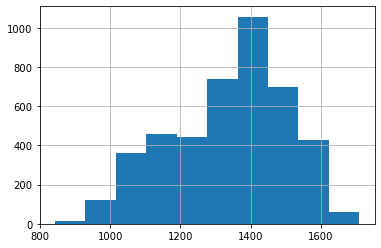

In [26]:
ops.consumption.hist()

<AxesSubplot:>

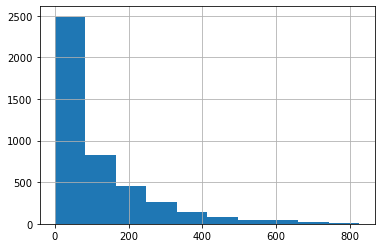

In [27]:
ops.wind.hist()

<AxesSubplot:>

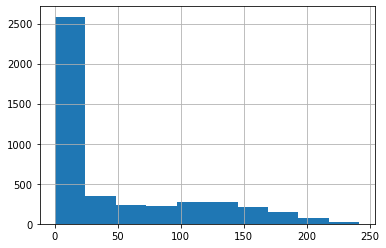

In [28]:
ops.solar.hist()

<AxesSubplot:>

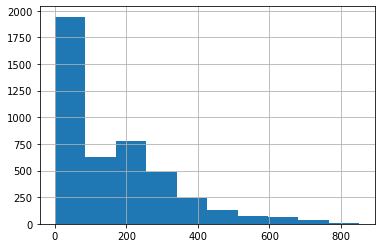

In [29]:
ops.wind_solar.hist()

<AxesSubplot:>

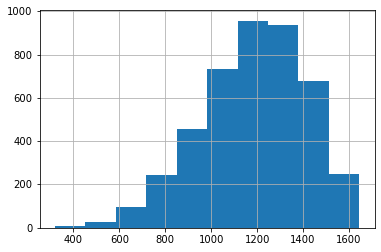

In [30]:
ops.non_renew.hist()

In [31]:
train = ops.loc[:'2016']
test = ops.loc['2017']

In [32]:
validate = train.loc['2016']

In [33]:
train.shape, validate.shape, test.shape

((4018, 7), (366, 7), (365, 7))

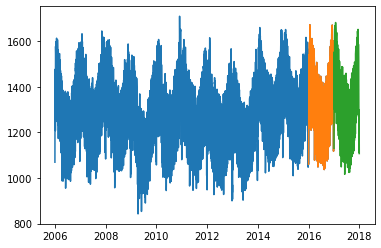

In [34]:
plt.plot(train.index, train.consumption)
plt.plot(validate.index, validate.consumption)
plt.plot(test.index, test.consumption)
plt.show()

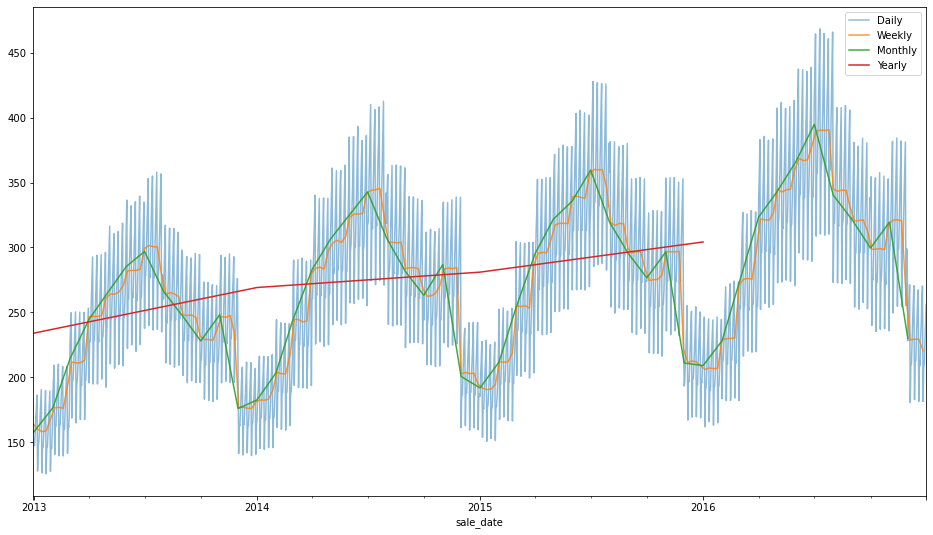

In [35]:
plt.figure(figsize=[16,9])
y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

<AxesSubplot:xlabel='sale_date'>

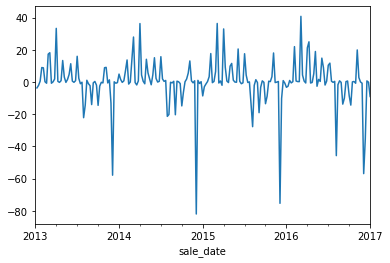

In [36]:
y.resample('W').mean().diff().plot()

In [37]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,157.894723,176.411855,214.181650,244.460082,264.663123,285.261279,296.881241,266.183375,247.237694,227.868064,248.108656,175.753692
2014,182.410791,203.207122,244.488991,282.786091,306.267538,324.965376,342.849100,307.345466,281.350430,263.133772,286.821036,200.538977
2015,191.725206,211.589839,253.739390,295.147608,321.813672,335.850784,359.698008,319.435676,295.088416,276.572155,296.583045,210.886208
2016,208.900519,227.977512,274.367406,323.461873,342.986382,366.316222,394.953287,340.315372,321.333920,299.518321,319.532559,229.882967


In [38]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,394.953287
8,266.183375,307.345466,319.435676,340.315372
9,247.237694,281.350430,295.088416,321.333920


<AxesSubplot:xlabel='sale_date'>

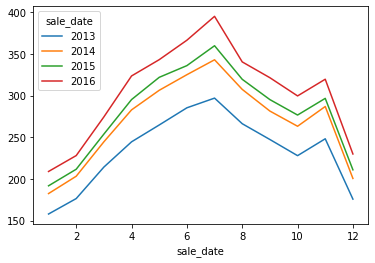

In [39]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

In [40]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

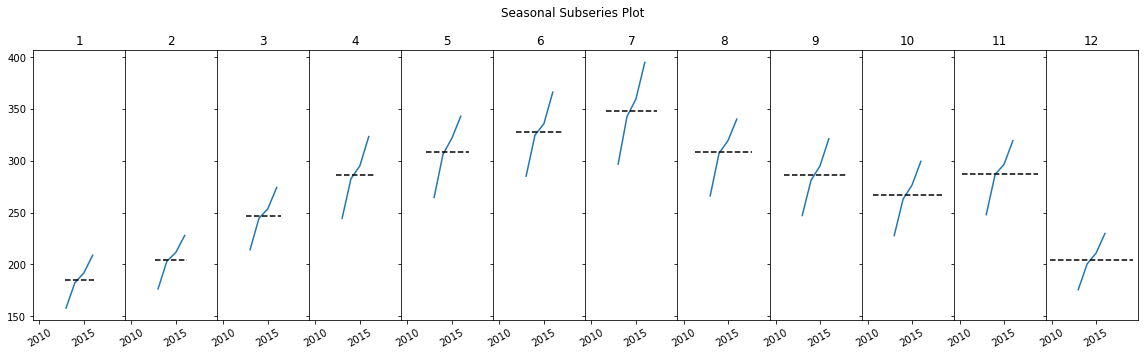

In [41]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(16, 5))

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.items()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [42]:
train['y(t + 1)'] = train.consumption.shift(-1)

/var/folders/5g/xrhpsnj56_v3scw9s4trbgxc0000gn/T/ipykernel_7535/2143379490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.consumption.shift(-1)


In [43]:
train.head()

,consumption,wind,solar,wind_solar,month,year,non_renew,y(t + 1)
date,,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006,1069.184,1380.521
2006-01-02,1380.521,0.0,0.0,0.0,January,2006,1380.521,1442.533
2006-01-03,1442.533,0.0,0.0,0.0,January,2006,1442.533,1457.217
2006-01-04,1457.217,0.0,0.0,0.0,January,2006,1457.217,1477.131
2006-01-05,1477.131,0.0,0.0,0.0,January,2006,1477.131,1403.427


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

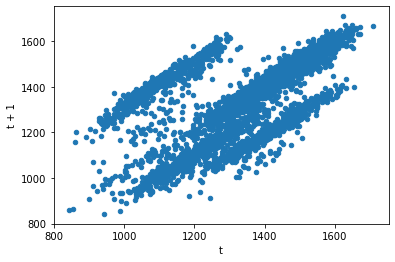

In [44]:
train.plot.scatter(x='consumption', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2006-01-01 to 2016-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4018 non-null   float64
 1   wind         4018 non-null   float64
 2   solar        4018 non-null   float64
 3   wind_solar   4018 non-null   float64
 4   month        4018 non-null   object 
 5   year         4018 non-null   int64  
 6   non_renew    4018 non-null   float64
 7   y(t + 1)     4017 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 282.5+ KB


In [46]:
weekly = train.drop(columns=['month','y(t + 1)'])

In [47]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2006-01-01 to 2016-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4018 non-null   float64
 1   wind         4018 non-null   float64
 2   solar        4018 non-null   float64
 3   wind_solar   4018 non-null   float64
 4   year         4018 non-null   int64  
 5   non_renew    4018 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 219.7 KB


In [50]:
weekly.tail()

,consumption,wind,solar,wind_solar,year,non_renew
date,,,,,,
2016-12-27,1289.324,640.895,23.448,664.343,2016,624.981
2016-12-28,1294.881,214.990,19.450,234.440,2016,1060.441
2016-12-29,1295.897,167.698,42.910,210.608,2016,1085.289
2016-12-30,1291.044,239.257,48.546,287.803,2016,1003.241
2016-12-31,1212.568,315.063,34.580,349.643,2016,862.925


In [51]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2006-01-01 to 2016-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4018 non-null   float64
 1   wind         4018 non-null   float64
 2   solar        4018 non-null   float64
 3   wind_solar   4018 non-null   float64
 4   year         4018 non-null   int64  
 5   non_renew    4018 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 219.7 KB


In [52]:
weekly.index = pd.to_datetime(weekly.index)

In [53]:
weekly

,consumption,wind,solar,wind_solar,year,non_renew
date,,,,,,
2006-01-01,1069.184,0.000,0.000,0.000,2006,1069.184
2006-01-02,1380.521,0.000,0.000,0.000,2006,1380.521
2006-01-03,1442.533,0.000,0.000,0.000,2006,1442.533
2006-01-04,1457.217,0.000,0.000,0.000,2006,1457.217
2006-01-05,1477.131,0.000,0.000,0.000,2006,1477.131
...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,624.981
2016-12-28,1294.881,214.990,19.450,234.440,2016,1060.441
2016-12-29,1295.897,167.698,42.910,210.608,2016,1085.289


In [54]:
weekly = weekly.resample('W').mean()

<AxesSubplot:xlabel='this_week', ylabel='next_week'>

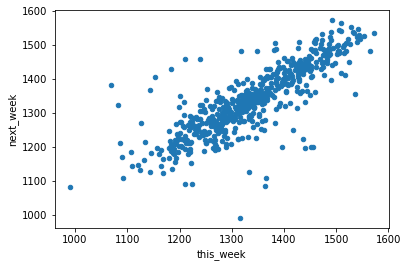

In [55]:
weekly['next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='next_week')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 52)'>

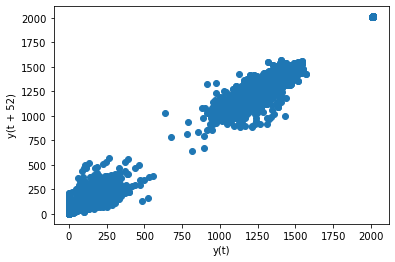

In [56]:
pd.plotting.lag_plot(weekly.resample('W').mean(), lag=52)

In [57]:
train = train.drop(columns=['month','y(t + 1)'])


In [59]:
train.index = pd.to_datetime(train.index)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

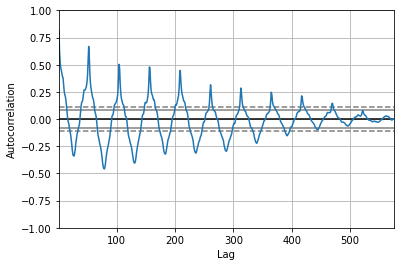

In [60]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())

In [61]:
y = train.consumption.resample('W').mean()

In [62]:
result = sm.tsa.seasonal_decompose(y)

In [63]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})


In [64]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()

<AxesSubplot:xlabel='date'>

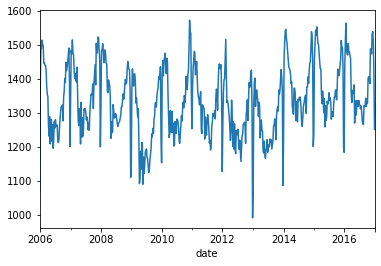

In [65]:
decomposition.y.plot()

<AxesSubplot:xlabel='date'>

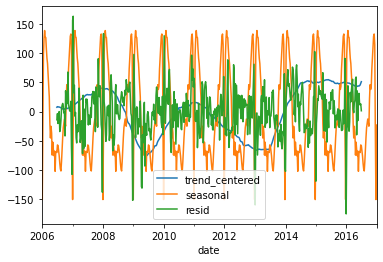

In [66]:
decomposition[['trend_centered', 'seasonal', 'resid']].plot()